## Problem Statement

#### The aim of this case study is to predict the price of AirBnB listings in major U.S. cities.

## Table of Content

* Importing Relevant Libraries
* Data Inspection
* Data Cleaning
* Splitting the Training Dataset into Training and Validation data
* Trying Different Models
* Model Interpretation

### Importing Relevant Libraries

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Data Inspection

In [2]:
# Setting the location for working Directory

%cd "C:\Users\shubh\Desktop\PYTHON\case study"

C:\Users\shubh\Desktop\PYTHON\case study


In [129]:
train = pd.read_excel("train excel.xlsx")

In [130]:
train.shape

(49999, 29)

* __We have 49999 rows and 29 columns in Train dataset__

In [5]:
# Viewing the Dataset

train.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price
0,6901257,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,5.010635
1,6304928,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,5.129899
2,7919400,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,4.976734
3,13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,6.620073
4,3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,4.744932


In [7]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

id                         0.000000
property_type              0.000000
room_type                  0.000000
amenities                  0.000000
accommodates               0.000000
bathrooms                  0.292006
bed_type                   0.000000
cancellation_policy        0.000000
cleaning_fee               0.000000
city                       0.000000
description                0.010000
first_review              21.422428
host_has_profile_pic       0.254005
host_identity_verified     0.254005
host_response_rate        24.676494
host_since                 0.254005
instant_bookable           0.000000
last_review               21.366427
latitude                   0.000000
longitude                  0.000000
name                       0.012000
neighbourhood              9.234185
number_of_reviews          0.000000
review_scores_rating      22.602452
thumbnail_url             11.190224
zipcode                    1.280026
bedrooms                   0.124002
beds                       0

In [8]:
# let's look into the Datatypes of the variables
train.dtypes

id                          int64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate        float64
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
log_price                 float64
dtype: object

In [9]:
train.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'log_price'],
      dtype='object')

## Data Cleaning

In [12]:
#Change the datatype to datetime
train['host_since'] = pd.to_datetime(train['host_since'])

In [16]:
# Filling the Null values with the mode of the same column
train['host_since'].fillna((train['host_since'].mode()[0]), inplace=True)

In [18]:
# Creating a new column with only years entry
train['host_since_year']=train['host_since'].dt.year

In [19]:
# Now calculating the difference from the present year
train['host_since_year'] = 2021 - (train['host_since_year'])

In [21]:
# Deleting the colomn
train.drop(['host_since'], axis=1, inplace=True)

In [27]:
# Removing the % sign from the host_reponse_rate column
train['host_response_rate'] = train.host_response_rate.replace('%','')

In [30]:
# Imputing mean in the place of Null
train['host_response_rate'].fillna((train['host_response_rate'].mean()), inplace=True)
train['review_scores_rating'].fillna((train['review_scores_rating'].mean()), inplace=True)

In [41]:
# Imputing null values wih mode
train['host_has_profile_pic'].fillna((train['host_has_profile_pic'].mode()[0]), inplace=True)
train['bathrooms'].fillna((train['bathrooms'].mode()[0]), inplace=True)
train['host_identity_verified'].fillna((train['host_identity_verified'].mode()[0]), inplace=True)
train['bedrooms'].fillna(train['bedrooms'].mode()[0], inplace=True)
train['beds'].fillna(train['beds'].mode()[0], inplace=True)

In [46]:
# Creating dummies for the categorical variables
dumm_cols = ['room_type', 'bed_type', 'cleaning_fee', 'city', 'host_has_profile_pic', 
               'host_identity_verified', 'instant_bookable', 'cancellation_policy']

In [47]:
# Concatenated dummies cols and dropped the original variable+
for col in dumm_cols:
    
    temp=pd.get_dummies(train[col],prefix=col,dtype=float)
    train=pd.concat([temp,train],1)
    train.drop([col],1,inplace=True)

In [48]:
train['property_type'].value_counts()


Apartment             33113
House                 11138
Condominium            1759
Townhouse              1146
Loft                    834
Other                   392
Guesthouse              324
Bed & Breakfast         320
Bungalow                264
Villa                   120
Dorm                     99
Guest suite              83
Camper/RV                63
In-law                   49
Cabin                    49
Hostel                   48
Timeshare                46
Boutique hotel           44
Boat                     36
Serviced apartment       16
Tent                     12
Castle                    8
Vacation home             7
Yurt                      7
Treehouse                 6
Hut                       5
Chalet                    3
Earth House               2
Train                     1
Cave                      1
Casa particular           1
Parking Space             1
Lighthouse                1
Tipi                      1
Name: property_type, dtype: int64

In [57]:
# Creating dummies seperately for property_type col

dum_pt = pd.get_dummies(train['property_type'], dtype=float)

In [58]:
dum_pt.columns

Index(['Apartment', 'Bed & Breakfast', 'Boat', 'Boutique hotel', 'Bungalow',
       'Cabin', 'Camper/RV', 'Casa particular', 'Castle', 'Cave', 'Chalet',
       'Condominium', 'Dorm', 'Earth House', 'Guest suite', 'Guesthouse',
       'Hostel', 'House', 'Hut', 'In-law', 'Lighthouse', 'Loft', 'Other',
       'Parking Space', 'Serviced apartment', 'Tent', 'Timeshare', 'Tipi',
       'Townhouse', 'Train', 'Treehouse', 'Vacation home', 'Villa', 'Yurt'],
      dtype='object')

In [59]:
# Dropping the columns which had less then 50 frequency
dum_pt.drop(['In-law','Cabin','Hostel', 'Timeshare', 'Boutique hotel', 'Boat','Serviced apartment','Tent',
             'Castle','Vacation home','Yurt','Treehouse','Hut','Chalet','Earth House','Train','Cave',
             'Casa particular','Parking Space','Lighthouse','Tipi'], axis=1, inplace = True)

In [60]:
train = pd.concat([train, dum_pt], axis=1)
train.drop(['property_type'], axis=1, inplace=True)

In [61]:
train.dtypes

cancellation_policy_flexible           float64
cancellation_policy_moderate           float64
cancellation_policy_strict             float64
cancellation_policy_super_strict_30    float64
cancellation_policy_super_strict_60    float64
instant_bookable_f                     float64
instant_bookable_t                     float64
host_identity_verified_f               float64
host_identity_verified_t               float64
host_has_profile_pic_f                 float64
host_has_profile_pic_t                 float64
city_Boston                            float64
city_Chicago                           float64
city_DC                                float64
city_LA                                float64
city_NYC                               float64
city_SF                                float64
cleaning_fee_False                     float64
cleaning_fee_True                      float64
bed_type_Airbed                        float64
bed_type_Couch                         float64
bed_type_Futo

In [62]:
object_columns = [col for col in train.columns if train[col].dtypes == 'object']

In [63]:
object_columns

['amenities',
 'description',
 'first_review',
 'last_review',
 'name',
 'neighbourhood',
 'thumbnail_url',
 'zipcode']

In [64]:
# Dropping these variables
object_columns_drop = ['amenities','description','first_review','last_review','name','neighbourhood','thumbnail_url','zipcode',
                      'latitude', 'longitude']

In [65]:
train.drop(object_columns_drop,1,inplace=True)

In [66]:
train.dtypes

cancellation_policy_flexible           float64
cancellation_policy_moderate           float64
cancellation_policy_strict             float64
cancellation_policy_super_strict_30    float64
cancellation_policy_super_strict_60    float64
instant_bookable_f                     float64
instant_bookable_t                     float64
host_identity_verified_f               float64
host_identity_verified_t               float64
host_has_profile_pic_f                 float64
host_has_profile_pic_t                 float64
city_Boston                            float64
city_Chicago                           float64
city_DC                                float64
city_LA                                float64
city_NYC                               float64
city_SF                                float64
cleaning_fee_False                     float64
cleaning_fee_True                      float64
bed_type_Airbed                        float64
bed_type_Couch                         float64
bed_type_Futo

In [67]:
train.isna().sum()

cancellation_policy_flexible           0
cancellation_policy_moderate           0
cancellation_policy_strict             0
cancellation_policy_super_strict_30    0
cancellation_policy_super_strict_60    0
instant_bookable_f                     0
instant_bookable_t                     0
host_identity_verified_f               0
host_identity_verified_t               0
host_has_profile_pic_f                 0
host_has_profile_pic_t                 0
city_Boston                            0
city_Chicago                           0
city_DC                                0
city_LA                                0
city_NYC                               0
city_SF                                0
cleaning_fee_False                     0
cleaning_fee_True                      0
bed_type_Airbed                        0
bed_type_Couch                         0
bed_type_Futon                         0
bed_type_Pull-out Sofa                 0
bed_type_Real Bed                      0
room_type_Entire

In [68]:
train.shape

(49999, 50)

## Trying Different ML Models Performances

In [114]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 'RandomForestRegressor', 'XGBRegressor']

rmse_list = []

__Splitting the training Dataset for the model validation__

In [115]:
# Seperate Features and Target
X= train.drop(columns = ['log_price', 'id'], axis=1)
y= train['log_price']

In [116]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [117]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    MSE= metrics.mean_squared_error(y_valid,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
   


In [118]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list})

In [119]:
evaluation

,Model,RMSE
0,Linear Regression,0.466998
1,Ridge Regression,0.466973
2,Lasso Regression,0.714046
3,K Neighbors Regressor,0.514315
4,Decision Tree Regressor,0.608113
5,RandomForestRegressor,0.455850
6,XGBRegressor,0.436318


* As we can clearly see that all the models except Linear Regression all the models are performing Good. And XGBRegressor is performing the best out of all the models, hence we will proceed with that that.

## Model Interpretation

In [120]:
plt.style.use('ggplot')

In [122]:
xgb = XGBRegressor()

In [123]:
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

[48/48] features ████████████████████ Time elapsed: 12 seconds

Text(0.5, 1.0, 'Feature Importance')

<Figure size 1152x720 with 0 Axes>

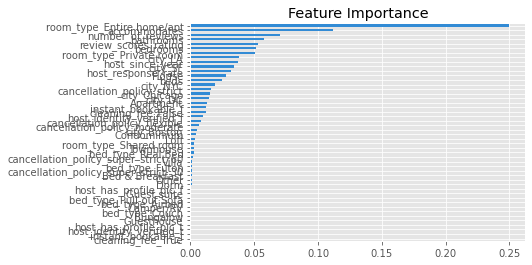

In [127]:
plt.figure(figsize=(16,10))
interpreter = Interpretation(X, feature_names=X.columns)
model = InMemoryModel(xgb.predict, examples=X)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending=False)
plt.title('Feature Importance')

In [102]:
# Let find the feature importance and their ranking using RandomForest
rf = RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor()

Feature ranking:
1. feature cancellation_policy_flexible (0.375835)
2. feature cancellation_policy_moderate (0.129445)
3. feature cancellation_policy_strict (0.072844)
4. feature cancellation_policy_super_strict_30 (0.052118)
5. feature cancellation_policy_super_strict_60 (0.042640)
6. feature instant_bookable_f (0.037764)
7. feature instant_bookable_t (0.036536)
8. feature host_identity_verified_f (0.034255)
9. feature host_identity_verified_t (0.019914)
10. feature host_has_profile_pic_f (0.019421)
11. feature host_has_profile_pic_t (0.015541)
12. feature city_Boston (0.011362)
13. feature city_Chicago (0.010363)
14. feature city_DC (0.009694)
15. feature city_LA (0.009227)
16. feature city_NYC (0.008940)
17. feature city_SF (0.008786)
18. feature cleaning_fee_False (0.008765)
19. feature cleaning_fee_True (0.008659)
20. feature bed_type_Airbed (0.008364)
21. feature bed_type_Couch (0.008293)
22. feature bed_type_Futon (0.008273)
23. feature bed_type_Pull-out Sofa (0.007968)
24. feat

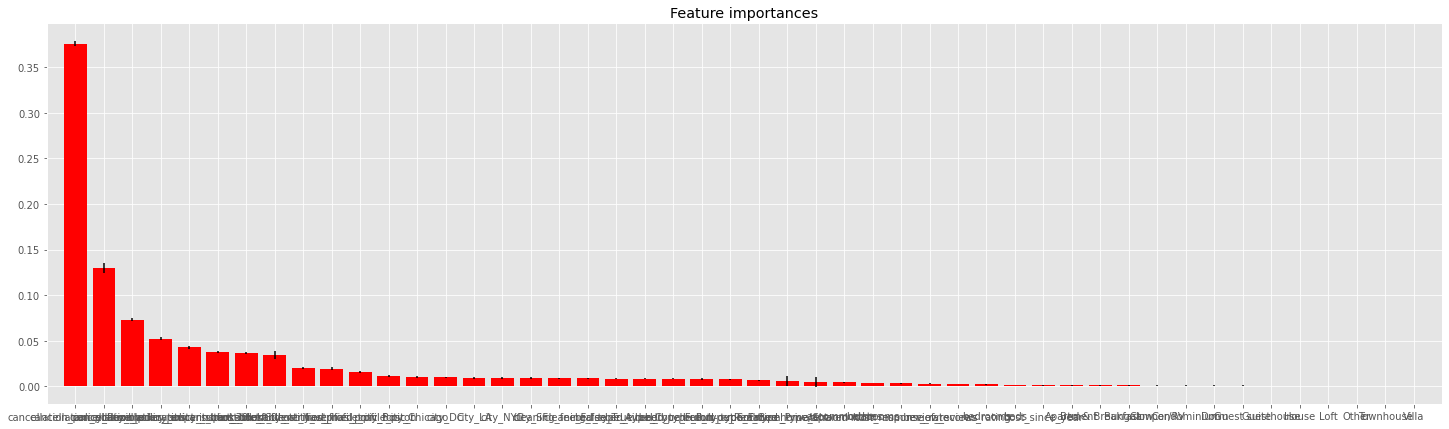

In [103]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, list(X_train.columns)[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(25,7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), list(X_train.columns))
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Now we will try building model with few of the insignificant variables dropped (According to the above Feature ranking)  from the Data and see if the model performance is improving

In [104]:
# Seperate Features and Target
X= train.drop(columns = ['Apartment','Bed & Breakfast','Bungalow','Camper/RV','Condominium',
                         'Dorm','Guest suite','Guesthouse','House','Loft','Other',
                         'Townhouse','Villa','log_price', 'id'], axis=1)
y= train['log_price']

In [105]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [106]:
algos = [RandomForestRegressor(), XGBRegressor()]

names = ['RandomForestRegressor', 'XGBRegressor']

rmse_list = []

In [107]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    MSE= metrics.mean_squared_error(y_valid,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
   


In [108]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list})

In [109]:
evaluation

,Model,RMSE
0,RandomForestRegressor,0.460564
1,XGBRegressor,0.440968


__In the above table we can see that the performance of the model not improving with removing the few variables__